# Import Packages

In [34]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
%matplotlib inline
import seaborn as sns

sns.set_style("white")
import itertools

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate

# Utility Functions and Pipelines

In [36]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
    
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=_cv,
                             scoring=scoring,
                             return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],"/n"
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],"/n"
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [37]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='black', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='grey', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# transaction datasets

the first 1 months transactions data
{'Training Accuracy scores': array([0.69771863, 0.70912548, 0.69106464, 0.69201521, 0.68631179]), 'Mean Training Accuracy': 69.52471482889734, 'Training Precision scores': array([0.69950739, 0.71253071, 0.68246445, 0.70448549, 0.69053708]), 'Mean Training Precision': 0.6979050258390408, 'Training Recall scores': array([0.59166667, 0.60542797, 0.60125261, 0.55741127, 0.56367432]), 'Mean Training Recall': 0.5838865692414753, 'Training F1 scores': array([0.64108352, 0.65462754, 0.63928968, 0.62237762, 0.62068966]), '/nMean Training F1 Score': 0.6356136033267046, 'Validation Accuracy scores': array([0.50190114, 0.5095057 , 0.5513308 , 0.53992395, 0.54372624]), 'Mean Validation Accuracy': 52.9277566539924, 'Validation Precision scores': array([0.44642857, 0.45631068, 0.50961538, 0.4950495 , 0.5       ]), 'Mean Validation Precision': 0.4814808281212203, 'Validation Recall scores': array([0.42016807, 0.39166667, 0.44166667, 0.41666667, 0.39166667]), 'Mean 

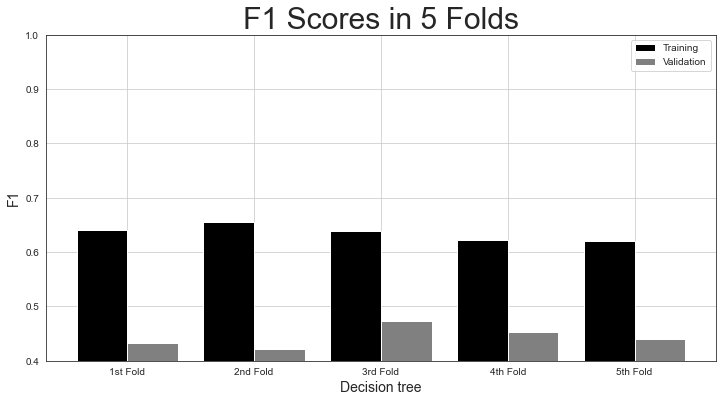

f1 score using the first 1 month(s) dataset is 0.44
the first 2 months transactions data
{'Training Accuracy scores': array([0.72317724, 0.73088322, 0.73029046, 0.72614108, 0.7292654 ]), 'Mean Training Accuracy': 72.79514800945057, 'Training Precision scores': array([0.70746634, 0.72166247, 0.68305439, 0.71251549, 0.74964235]), 'Mean Training Precision': 0.7148682075529206, 'Training Recall scores': array([0.71712159, 0.71091811, 0.81118012, 0.71428571, 0.65012407]), 'Mean Training Recall': 0.7207259220442952, 'Training F1 scores': array([0.71226124, 0.71625   , 0.74162408, 0.7133995 , 0.69634551]), '/nMean Training F1 Score': 0.7159760681019695, 'Validation Accuracy scores': array([0.54265403, 0.48815166, 0.48815166, 0.48578199, 0.47980998]), 'Mean Validation Accuracy': 49.69098625479844, 'Validation Precision scores': array([0.51923077, 0.46031746, 0.472     , 0.46543779, 0.44767442]), 'Mean Validation Precision': 0.4729320872342628, 'Validation Recall scores': array([0.53731343, 0.4

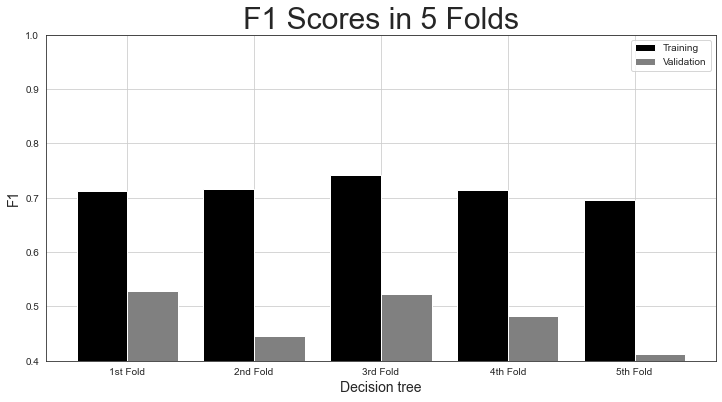

f1 score using the first 2 month(s) dataset is 0.48
the first 3 months transactions data
{'Training Accuracy scores': array([0.79740135, 0.80510106, 0.80413859, 0.8018278 , 0.80615681]), 'Mean Training Accuracy': 80.29251217894145, 'Training Precision scores': array([0.76976542, 0.77768091, 0.77300086, 0.776028  , 0.76936027]), 'Mean Training Precision': 0.7731670907583638, 'Training Recall scores': array([0.85028791, 0.85604607, 0.86276392, 0.85043145, 0.87631831]), 'Mean Training Recall': 0.8591695297964863, 'Training F1 scores': array([0.80802554, 0.81498401, 0.8154195 , 0.8115279 , 0.81936351]), '/nMean Training F1 Score': 0.8138640933723359, 'Validation Accuracy scores': array([0.55769231, 0.53076923, 0.56538462, 0.54142582, 0.55105973]), 'Mean Validation Accuracy': 54.92663405958205, 'Validation Precision scores': array([0.55849057, 0.52733119, 0.56097561, 0.53873239, 0.54179567]), 'Mean Validation Precision': 0.5454650851010633, 'Validation Recall scores': array([0.56704981, 0.6

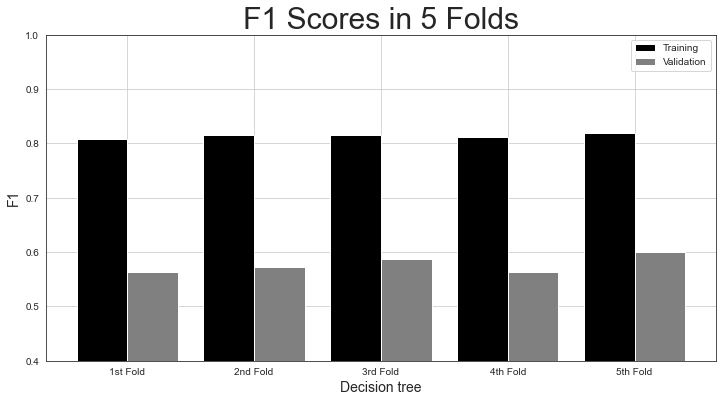

f1 score using the first 3 month(s) dataset is 0.58
the first 4 months transactions data
{'Training Accuracy scores': array([0.8664966 , 0.86564626, 0.86904762, 0.86309524, 0.86352041]), 'Mean Training Accuracy': 86.5561224489796, 'Training Precision scores': array([0.8489543 , 0.83873399, 0.85170807, 0.83890578, 0.83954373]), 'Mean Training Precision': 0.8435691722548977, 'Training Recall scores': array([0.90205761, 0.91604938, 0.90362438, 0.90939044, 0.90939044]), 'Mean Training Recall': 0.9081024535426877, 'Training F1 scores': array([0.87470072, 0.87568843, 0.87689848, 0.87272727, 0.87307236]), '/nMean Training F1 Score': 0.8746174534277961, 'Validation Accuracy scores': array([0.58673469, 0.57653061, 0.62414966, 0.60544218, 0.59183673]), 'Mean Validation Accuracy': 59.693877551020414, 'Validation Precision scores': array([0.60273973, 0.57941176, 0.63606557, 0.61180124, 0.59411765]), 'Mean Validation Precision': 0.604827190759724, 'Validation Recall scores': array([0.58085809, 0.65

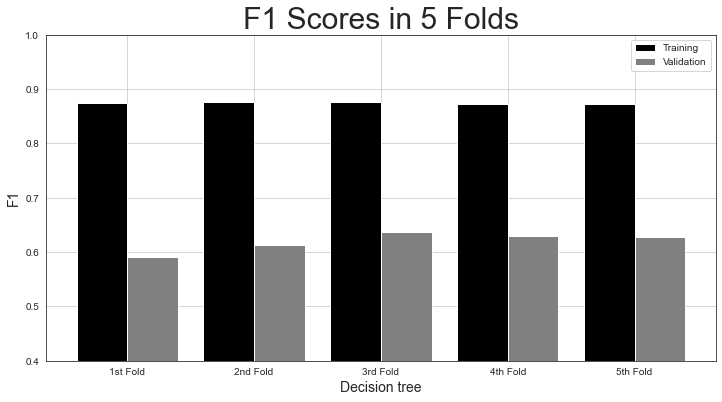

f1 score using the first 4 month(s) dataset is 0.62
the first 5 months transactions data
{'Training Accuracy scores': array([0.91643564, 0.91287129, 0.91053048, 0.91369755, 0.91092637]), 'Mean Training Accuracy': 91.28922649984712, 'Training Precision scores': array([0.90915645, 0.90620491, 0.90763636, 0.90524049, 0.90179211]), 'Mean Training Precision': 0.9060060650934894, 'Training Recall scores': array([0.93684993, 0.93313522, 0.92650334, 0.93615442, 0.9346211 ]), 'Mean Training Recall': 0.9334527997387845, 'Training F1 scores': array([0.92279546, 0.91947291, 0.91697281, 0.92043796, 0.91791317]), '/nMean Training F1 Score': 0.9195184634330303, 'Validation Accuracy scores': array([0.56170886, 0.59177215, 0.60063391, 0.61172742, 0.62599049]), 'Mean Validation Accuracy': 59.836656703243804, 'Validation Precision scores': array([0.58474576, 0.61318052, 0.62      , 0.62816901, 0.64553314]), 'Mean Validation Precision': 0.6183256867532118, 'Validation Recall scores': array([0.61424332, 0.

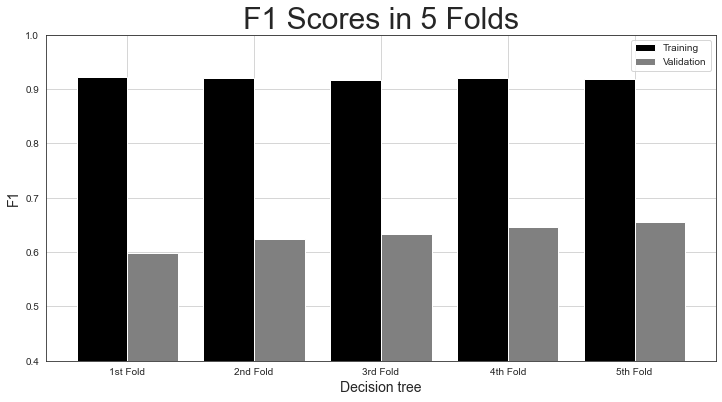

f1 score using the first 5 month(s) dataset is 0.63
the first 6 months transactions data
{'Training Accuracy scores': array([0.94328131, 0.94366197, 0.941378  , 0.94175866, 0.93873668]), 'Mean Training Accuracy': 94.17633241962781, 'Training Precision scores': array([0.95241477, 0.95116773, 0.94339623, 0.94467787, 0.93702422]), 'Mean Training Precision': 0.945736163996381, 'Training Recall scores': array([0.94237526, 0.94448349, 0.94869993, 0.94799719, 0.9508427 ]), 'Mean Training Recall': 0.9468797129027928, 'Training F1 scores': array([0.94736842, 0.94781382, 0.94604064, 0.94633462, 0.94388289]), '/nMean Training F1 Score': 0.9462880787003005, 'Validation Accuracy scores': array([0.6042618 , 0.59665145, 0.6194825 , 0.61187215, 0.64939024]), 'Mean Validation Accuracy': 61.63316256450236, 'Validation Precision scores': array([0.62834225, 0.62465753, 0.65142857, 0.63911846, 0.68882175]), 'Mean Validation Precision': 0.6464737122461177, 'Validation Recall scores': array([0.66011236, 0.64

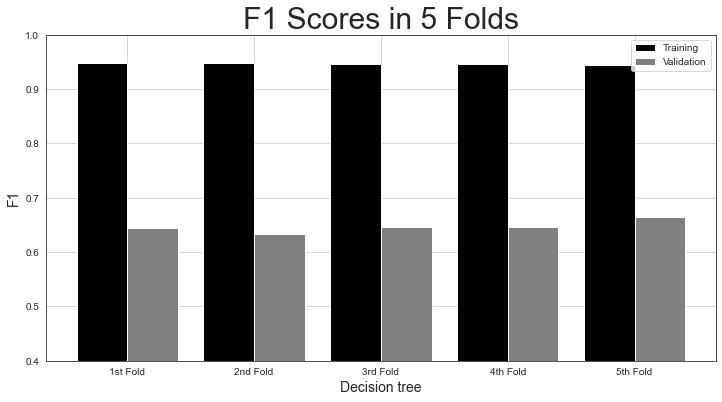

f1 score using the first 6 month(s) dataset is 0.65
the first 7 months transactions data
{'Training Accuracy scores': array([0.9688196 , 0.96733482, 0.96288048, 0.96400742, 0.96437848]), 'Mean Training Accuracy': 96.54841584335698, 'Training Precision scores': array([0.97620666, 0.97227857, 0.9701087 , 0.97082768, 0.96957404]), 'Mean Training Precision': 0.9717991281359779, 'Training Recall scores': array([0.96700337, 0.96835017, 0.96226415, 0.96363636, 0.96565657]), 'Mean Training Recall': 0.9653821231179723, 'Training F1 scores': array([0.97158322, 0.97031039, 0.9661705 , 0.96721865, 0.96761134]), '/nMean Training F1 Score': 0.9685788207182668, 'Validation Accuracy scores': array([0.61424332, 0.64540059, 0.65281899, 0.6359584 , 0.6731055 ]), 'Mean Validation Accuracy': 64.43053602056429, 'Validation Precision scores': array([0.64959569, 0.67277487, 0.69602273, 0.67403315, 0.69712794]), 'Mean Validation Precision': 0.6779108740444594, 'Validation Recall scores': array([0.64959569, 0.6

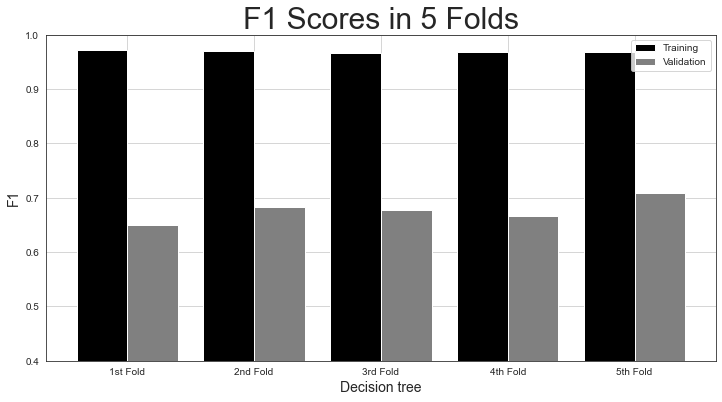

f1 score using the first 7 month(s) dataset is 0.68
the first 8 months transactions data
{'Training Accuracy scores': array([0.983924  , 0.98246255, 0.98100804, 0.98027757, 0.98027757]), 'Mean Training Accuracy': 98.15899478856555, 'Training Precision scores': array([0.98685076, 0.98616601, 0.98678123, 0.98676373, 0.98740888]), 'Mean Training Precision': 0.9867941212025497, 'Training Recall scores': array([0.9842623 , 0.98228346, 0.97901639, 0.97770492, 0.97704918]), 'Mean Training Recall': 0.980063250290435, 'Training F1 scores': array([0.98555483, 0.98422091, 0.98288348, 0.98221344, 0.98220171]), '/nMean Training F1 Score': 0.9834148723828772, 'Validation Accuracy scores': array([0.6189781 , 0.64817518, 0.64181287, 0.66520468, 0.66959064]), 'Mean Validation Accuracy': 64.87522943612072, 'Validation Precision scores': array([0.66853933, 0.68217054, 0.67989418, 0.69387755, 0.70666667]), 'Mean Validation Precision': 0.6862296532119221, 'Validation Recall scores': array([0.62467192, 0.69

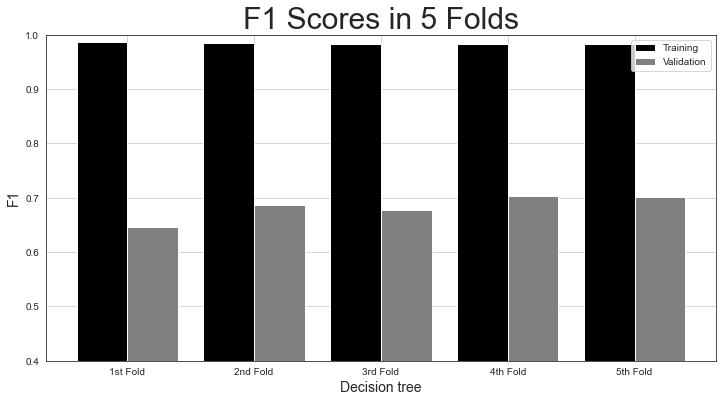

f1 score using the first 8 month(s) dataset is 0.68
the first 9 months transactions data
{'Training Accuracy scores': array([0.99093546, 0.99202321, 0.99093546, 0.9913012 , 0.9913012 ]), 'Mean Training Accuracy': 99.12993036698931, 'Training Precision scores': array([0.99608355, 0.99480182, 0.99608099, 0.99673416, 0.99608611]), 'Mean Training Precision': 0.9959573258893313, 'Training Recall scores': array([0.98770227, 0.99093851, 0.9876943 , 0.98770227, 0.98834951]), 'Mean Training Recall': 0.9884773714304878, 'Training F1 scores': array([0.9918752 , 0.99286641, 0.99186992, 0.99219766, 0.99220273]), '/nMean Training F1 Score': 0.9922023834850056, 'Validation Accuracy scores': array([0.67391304, 0.68550725, 0.67536232, 0.67634253, 0.66473149]), 'Mean Validation Accuracy': 67.5171325802991, 'Validation Precision scores': array([0.71815718, 0.70361446, 0.7270195 , 0.70951157, 0.69820972]), 'Mean Validation Precision': 0.7113024849607706, 'Validation Recall scores': array([0.6865285 , 0.75

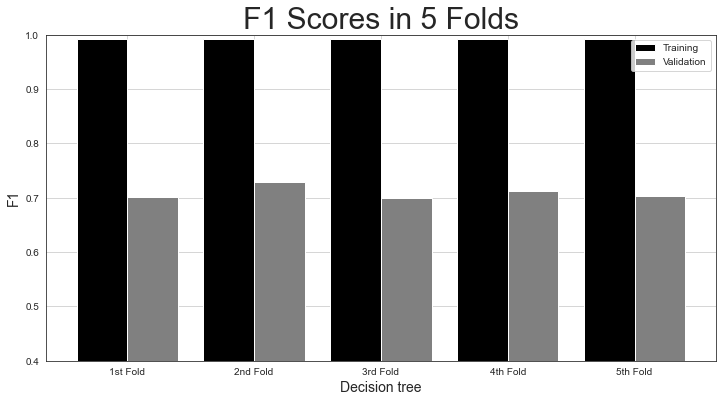

f1 score using the first 9 month(s) dataset is 0.71
the first 10 months transactions data
{'Training Accuracy scores': array([0.99639769, 0.99567723, 0.99747839, 0.99675793, 0.99675793]), 'Mean Training Accuracy': 99.66138328530259, 'Training Precision scores': array([0.9993565 , 1.        , 0.99935774, 1.        , 0.9993565 ]), 'Mean Training Precision': 0.9996141475910262, 'Training Recall scores': array([0.99423816, 0.99231754, 0.99615877, 0.99423447, 0.99487508]), 'Mean Training Recall': 0.9943648027586638, 'Training F1 scores': array([0.99679076, 0.99614396, 0.99775569, 0.9971089 , 0.99711075]), '/nMean Training F1 Score': 0.9969820119519651, 'Validation Accuracy scores': array([0.73342939, 0.71613833, 0.69884726, 0.70893372, 0.72622478]), 'Mean Validation Accuracy': 71.67146974063401, 'Validation Precision scores': array([0.77188329, 0.75596817, 0.73629243, 0.72881356, 0.769437  ]), 'Mean Validation Precision': 0.7524788887450887, 'Validation Recall scores': array([0.74615385, 0.

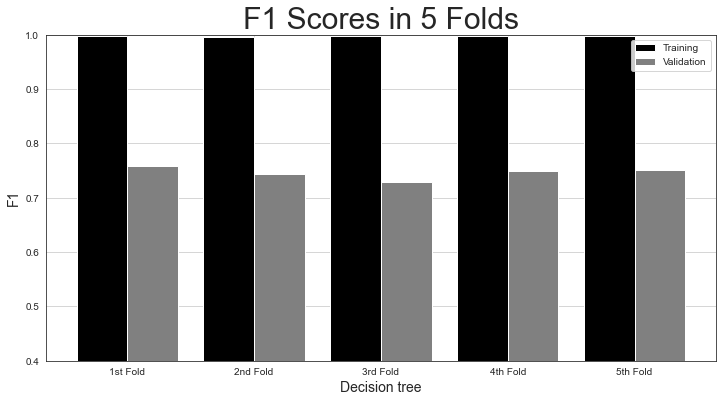

f1 score using the first 10 month(s) dataset is 0.75
the first 11 months transactions data
{'Training Accuracy scores': array([0.99964132, 0.99928264, 0.99928264, 0.99928264, 0.99928264]), 'Mean Training Accuracy': 99.93543758967, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([0.99936468, 0.99872935, 0.99872935, 0.99872854, 0.99872854]), 'Mean Training Recall': 0.998856093657988, 'Training F1 scores': array([0.99968224, 0.99936427, 0.99936427, 0.99936387, 0.99936387]), '/nMean Training F1 Score': 0.9994277033206412, 'Validation Accuracy scores': array([0.78335725, 0.78622669, 0.82209469, 0.80631277, 0.76327116]), 'Mean Validation Accuracy': 79.22525107604017, 'Validation Precision scores': array([0.81510417, 0.79901961, 0.85488127, 0.8278481 , 0.80371353]), 'Mean Validation Precision': 0.8201133340235701, 'Validation Recall scores': array([0.79643766, 0.82951654, 0.82442748, 0.82994924, 0.76903553]), 'Mean Vali

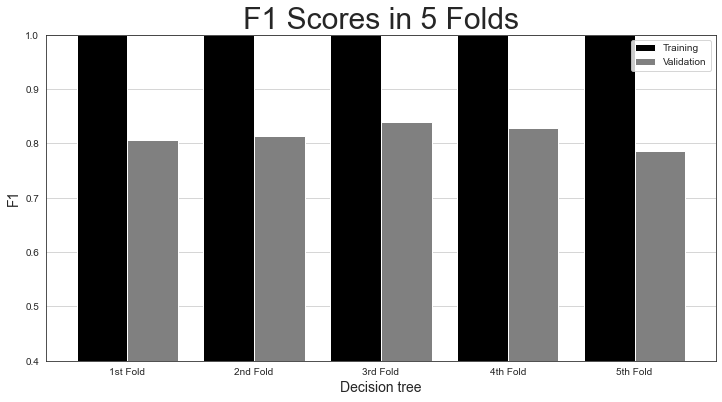

f1 score using the first 11 month(s) dataset is 0.81
the first 12 months transactions data
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), '/nMean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.88395415, 0.86532951, 0.88825215, 0.8739255 , 0.88395415]), 'Mean Validation Accuracy': 87.90830945558739, 'Validation Precision scores': array([0.91733333, 0.88659794, 0.90306122, 0.88664987, 0.89054726]), 'Mean Validation Precision': 0.8968379267408932, 'Validation Recall scores': array([0.87309645, 0.87309645, 0.89847716, 0.89113924, 0.90632911]), 'Mean Validation Recall': 0.8884276810383602, 'Validation F1 scores': array([0.8946684 , 0.8797954 , 0.90076336, 0.88888889, 0.89836888]), 'Mean Validation F1 Score': 0

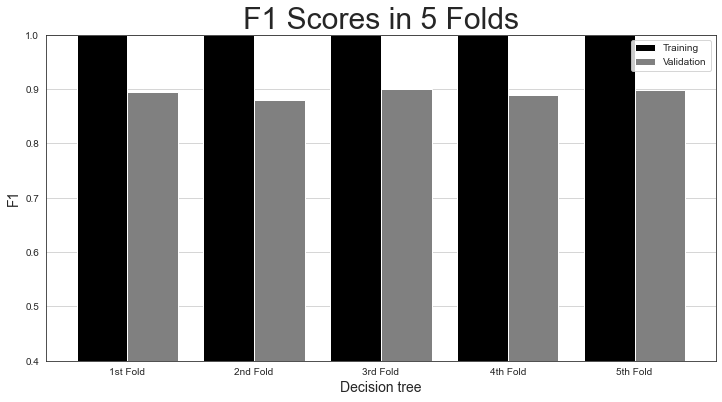

f1 score using the first 12 month(s) dataset is 0.89


In [21]:
f1 = []

for i in range(12):
    file_name ='PastCust_trans_cut_first' + '_' + str(i+1) + '_' + 'months_labeled_2.xlsx'
    PastCust_trans_cut_labeled_2 = pd.read_excel(file_name)
    PastCust_trans_cut_labeled_2['cluster'] = PastCust_trans_cut_labeled_2['cluster'].apply(lambda x: 0 if x == 'high' else 1)

    print(f"the first {i+1} months transactions data")
    
    df = PastCust_trans_cut_labeled_2.drop(columns = ['customer_id'], axis=1)
    X = df.drop(columns=['cluster']).copy()
    X = pd.get_dummies(X) 
    y = df['cluster']
    
    dtclf = DecisionTreeClassifier()
    res = cross_validation(dtclf, X, y, 5)
    print(res)
    # Plot F1-Score Result
    plot_result('Decision tree',
            "F1",
            "F1 Scores in 5 Folds",
            res["Training F1 scores"],
            res["Validation F1 scores"])
    
    trans_f1 = round(res['Mean Validation F1 Score'], 2)
    f1.append(trans_f1)
    print(f'f1 score using the first {i+1} month(s) dataset is {trans_f1}')

# demographic dataset

In [28]:
PastCust_demo_cat_labeled_2 = pd.read_excel('PastCust_demo_cat_labeled_2.xlsx')
PastCust_demo_cat_labeled_2['cluster'] = PastCust_demo_cat_labeled_2['cluster'].apply(lambda x: 0 if x == 'high' else 1)

In [29]:
df = PastCust_demo_cat_labeled_2.drop(columns = ['customer_id'], axis=1)
X = df.drop(columns=['cluster']).copy()
X = pd.get_dummies(X) 
y = df['cluster']

{'Training Accuracy scores': array([0.77146001, 0.77366104, 0.7839325 , 0.77484415, 0.779978  ]), 'Mean Training Accuracy': 77.67751414417549, 'Training Precision scores': array([0.84043321, 0.83066202, 0.83947186, 0.83298393, 0.8341396 ]), 'Mean Training Precision': 0.8355381231703477, 'Training Recall scores': array([0.74329502, 0.76117497, 0.77139208, 0.76068922, 0.77026165]), 'Mean Training Recall': 0.7613625860968687, 'Training F1 scores': array([0.78888512, 0.79440187, 0.80399334, 0.7951968 , 0.800929  ]), '/nMean Training F1 Score': 0.7966812260064056, 'Validation Accuracy scores': array([0.48680352, 0.49266862, 0.48387097, 0.49926579, 0.53303965]), 'Mean Validation Accuracy': 49.91297083381778, 'Validation Precision scores': array([0.56      , 0.56571429, 0.56024096, 0.56906077, 0.59945504]), 'Mean Validation Precision': 0.570894212784461, 'Validation Recall scores': array([0.5       , 0.50510204, 0.4744898 , 0.52685422, 0.56265985]), 'Mean Validation Recall': 0.513821180646171

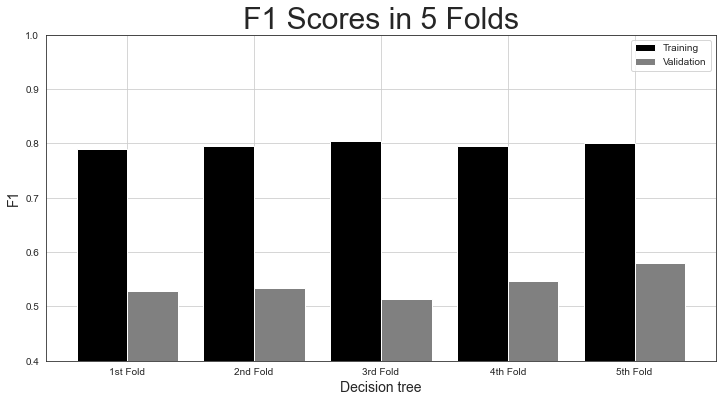

In [30]:
dtclf = DecisionTreeClassifier()
res = cross_validation(dtclf, X, y, 5)
print(res)
# Plot F1-Score Result
plot_result('Decision tree',
            "F1",
            "F1 Scores in 5 Folds",
            res["Training F1 scores"],
            res["Validation F1 scores"])

In [31]:
demo_f1 = round(res['Mean Validation F1 Score'], 2)
print(f'f1 score using demo dataset is {demo_f1}')

f1 score using demo dataset is 0.54


# Model Comparison

In [23]:
f1

[0.44, 0.48, 0.58, 0.62, 0.63, 0.65, 0.68, 0.68, 0.71, 0.75, 0.81, 0.89]

In [24]:
M = [1,2,3,4,5,6,7,8,9,10,11,12]

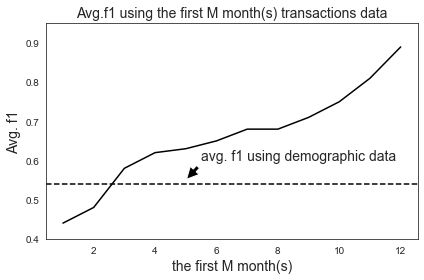

In [33]:
axis_font = {'fontname':'Arial', 'size':'14'}

fig, ax = plt.subplots()
  
line = ax.plot(M, f1, color='black')
plt.axhline(y=demo_f1, color='black', linestyle='--')

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.xlabel("the first M month(s)", **axis_font)
plt.ylabel("Avg. f1", **axis_font)
plt.title('Avg.f1 using the first M month(s) transactions data', **axis_font)

plt.tight_layout()

# Annotation
ax.annotate('avg. f1 using demographic data', xy =(5, 0.55),
                xytext =(5.5, 0.6), 
                arrowprops = dict(facecolor ='black',
                                  shrink = 0.05), **axis_font)
  
ax.set_ylim(0.40, 0.95)
  
# Plot the graph
plt.savefig('f1.png')
plt.show()